In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_excel('【ローデータ・GT表】2403運転免許保有者に関する調査.xlsx', sheet_name='基準クリア年齢性別順')
df


#欠損値のある列を確認
null_columns = df.columns[df.isnull().any()]
print(null_columns)

# #欠損値のある行を確認
# df[df.isnull().any(axis=1)]

# print(df.isnull().any())
print(df.isnull().sum())


Index(['q1_snt4_1', 'q2_snt4_1', 'q6', 'q7', 'q8', 'q9', 'q10'], dtype='object')
no        0
group1    0
group2    0
sc1       0
sc2_1     0
         ..
cq-2      0
dq-1      0
dq-2      0
eq-1      0
eq-2      0
Length: 258, dtype: int64


In [19]:

# sc5列の作成: 各行で'1'がある位置に応じて0, 1, 2に変換
df['sc5'] = df[['sc5-1', 'sc5-2', 'sc5-3']].idxmax(axis=1)

# 'sc5-1', 'sc5-2', 'sc5-3'を数値に変換
df['sc5'] = df['sc5'].map({'sc5-1': 0, 'sc5-2': 1, 'sc5-3': 2})

# 元のsc5-1, sc5-2, sc5-3の列を削除（不要なら）
df = df.drop(columns=['sc5-1', 'sc5-2', 'sc5-3'])

#sc7列の作成'sc7-1'~'sc7-23'
df['sc7'] = df[['sc7-1', 'sc7-2', 'sc7-3', 'sc7-4', 'sc7-5', 'sc7-6', 'sc7-7', 'sc7-8', 'sc7-9', 'sc7-10', 'sc7-11', 'sc7-12', 'sc7-13', 'sc7-14', 'sc7-15', 'sc7-16', 'sc7-17', 'sc7-18', 'sc7-19', 'sc7-20', 'sc7-21', 'sc7-22', 'sc7-23']].idxmax(axis=1)

# 'sc7-1', 'sc7-2', 'sc7-3', 'sc7-4', 'sc7-5', 'sc7-6', 'sc7-7', 'sc7-8', 'sc7-9', 'sc7-10', 'sc7-11', 'sc7-12', 'sc7-13', 'sc7-14', 'sc7-15', 'sc7-16', 'sc7-17', 'sc7-18', 'sc7-19', 'sc7-20', 'sc7-21', 'sc7-22', 'sc7-23'を数値に変換
df['sc7'] = df['sc7'].map({'sc7-1': 0, 'sc7-2': 1, 'sc7-3': 2, 'sc7-4': 3, 'sc7-5': 4, 'sc7-6': 5, 'sc7-7': 6, 'sc7-8': 7, 'sc7-9': 8, 'sc7-10': 9, 'sc7-11': 10, 'sc7-12': 11, 'sc7-13': 12, 'sc7-14': 13, 'sc7-15': 14, 'sc7-16': 15, 'sc7-17': 16, 'sc7-18': 17, 'sc7-19': 18, 'sc7-20': 19, 'sc7-21': 20, 'sc7-22': 21, 'sc7-23': 22})

# 元のsc7-1, sc7-2, sc7-3, sc7-4, sc7-5, sc7-6, sc7-7, sc7-8, sc7-9, sc7-10, sc7-11, sc7-12, sc7-13, sc7-14, sc7-15, sc7-16, sc7-17, sc7-18, sc7-19, sc7-20, sc7-21, sc7-22, sc7-23の列を削除（不要なら）
df = df.drop(columns=['sc7-1', 'sc7-2', 'sc7-3', 'sc7-4', 'sc7-5', 'sc7-6', 'sc7-7', 'sc7-8', 'sc7-9', 'sc7-10', 'sc7-11', 'sc7-12', 'sc7-13', 'sc7-14', 'sc7-15', 'sc7-16', 'sc7-17', 'sc7-18', 'sc7-19', 'sc7-20', 'sc7-21', 'sc7-22', 'sc7-23'])

In [20]:
#欠損値のある列を確認
null_columns = df.columns[df.isnull().any()]
print(null_columns)


Index(['q1_snt4_1', 'q2_snt4_1', 'q6', 'q7', 'q8', 'q9', 'q10'], dtype='object')


In [21]:
df.drop(['no','group1','group2','sc8','q1_snt4_1','q2_snt4_1','q6', 'q7', 'q8', 'q9', 'q10'],axis=1,inplace=True)
df.columns

Index(['sc1', 'sc2_1', 'sc3', 'sc4', 'sc6', 'q1', 'q2', 'q3', 'q4', 'q4sq',
       ...
       'bq-1', 'bq-2', 'cq-1', 'cq-2', 'dq-1', 'dq-2', 'eq-1', 'eq-2', 'sc5',
       'sc7'],
      dtype='object', length=223)

In [22]:
df.rename(columns={'sc1':'性別','sc2':'年齢','sc3':'住まい','sc4':'結婚フラグ','sc5':'子供フラグ','sc6':'職業','sc7':'業種','q1':'回答機器','q2':'回答音響機器','q3':'回答時周辺状況','q4':'免許種類','q4sq':'免許取得時期','q5':'運転頻度','q5sq':'最後運転時期'},inplace=True)

In [23]:
df

,性別,sc2_1,住まい,結婚フラグ,職業,回答機器,回答音響機器,回答時周辺状況,免許種類,免許取得時期,...,bq-1,bq-2,cq-1,cq-2,dq-1,dq-2,eq-1,eq-2,子供フラグ,業種
0,1,28,14,1,1,1,2,1,2,4,...,1,0,1,0,1,0,1,0,2,6
1,1,28,1,2,1,2,1,4,2,4,...,1,0,1,0,1,0,1,0,0,0
2,1,28,11,2,9,1,1,3,2,4,...,1,0,1,0,1,0,1,0,0,18
3,1,20,21,1,12,2,1,1,1,2,...,1,0,1,0,1,0,1,0,2,14
4,1,27,13,2,11,1,1,1,1,4,...,1,0,1,0,1,0,1,0,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,2,72,40,2,10,1,1,2,2,5,...,1,0,1,0,1,0,1,0,0,22
800,2,71,13,2,11,3,1,1,2,5,...,1,0,1,0,1,0,1,0,1,22
801,2,72,13,2,10,2,3,2,2,5,...,1,0,1,0,1,0,1,0,2,22
802,2,75,43,2,11,1,1,1,2,5,...,1,0,1,0,1,0,1,0,1,22


In [96]:
#df.sc2_1のdataframeを作成,列名をageにする
df_age = pd.DataFrame(df.sc2_1)
df_age.rename(columns={'sc2_1':'age'},inplace=True)


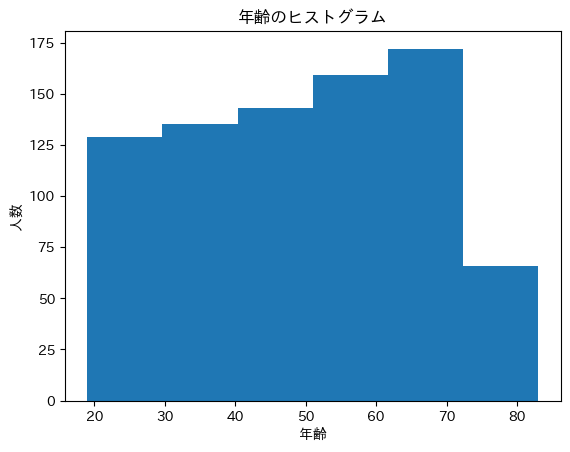

In [97]:

#df.sc2_1のヒストグラム(年齢) 19~83歳
import japanize_matplotlib

#ヒストグラム　bins数を指定
plt.hist(df_age,bins=6)
#ラベル名
plt.xlabel('年齢')
plt.ylabel('人数')
plt.title('年齢のヒストグラム')
plt.show()

In [98]:
#19~30,31~40,41~50,51~60,61~70,71~83
#年齢別の人数
df_age['age_bin'] = pd.cut(df_age['age'], [19,30,40,50,60,70,83], right=False)

df_age.value_counts()
df_age.to_csv('surbay_data.csv',index=False)
df_age.head(10)

,age,age_bin
0,28,"[19, 30)"
1,28,"[19, 30)"
2,28,"[19, 30)"
3,20,"[19, 30)"
4,27,"[19, 30)"
5,24,"[19, 30)"
6,28,"[19, 30)"
7,27,"[19, 30)"
8,25,"[19, 30)"
9,20,"[19, 30)"


In [ ]:
df.coloumns = ['性別','年齢']

In [ ]:
# #カラム名'sc1'を性別に，'sc2_1'を年齢に変更
# df.rename(columns={'sc1':'性別','sc2_1':'年齢'},inplace=True)

In [4]:
na_col = df.isna().any()
print(na_col)
df.loc[:, na_col]

#欠損値のある列を削除
df_dropna = df.dropna(axis=1)
print(df_dropna)


#df_dropna[['no','group1','group2']]列を削除
df_dropna = df_dropna.drop(['no','group1','group2','eq50'], axis=1)
df_dropna




no        False
group1    False
group2    False
sc1       False
sc2_1     False
          ...  
cq-2      False
dq-1      False
dq-2      False
eq-1      False
eq-2      False
Length: 258, dtype: bool
       no  group1  group2  sc1  sc2_1  sc3  sc4  sc5-1  sc5-2  sc5-3  ...  \
0      87       1       1    1     28   14    1      0      0      1  ...   
1     105       1       1    1     28    1    2      1      0      0  ...   
2     109       1       1    1     28   11    2      1      0      0  ...   
3     119       1       1    1     20   21    1      0      0      1  ...   
4     145       1       1    1     27   13    2      0      0      1  ...   
..    ...     ...     ...  ...    ...  ...  ...    ...    ...    ...  ...   
799  2984      12      23    2     72   40    2      1      0      0  ...   
800  2989      12      23    2     71   13    2      0      1      0  ...   
801  2992      12      23    2     72   13    2      0      0      1  ...   
802  2994      12      23    

,sc1,sc2_1,sc3,sc4,sc5-1,sc5-2,sc5-3,sc6,sc7-1,sc7-2,...,aq-1,aq-2,bq-1,bq-2,cq-1,cq-2,dq-1,dq-2,eq-1,eq-2
0,1,28,14,1,0,0,1,1,0,0,...,1,0,1,0,1,0,1,0,1,0
1,1,28,1,2,1,0,0,1,1,0,...,1,0,1,0,1,0,1,0,1,0
2,1,28,11,2,1,0,0,9,0,0,...,1,0,1,0,1,0,1,0,1,0
3,1,20,21,1,0,0,1,12,0,0,...,1,0,1,0,1,0,1,0,1,0
4,1,27,13,2,0,0,1,11,0,0,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,2,72,40,2,1,0,0,10,0,0,...,1,0,1,0,1,0,1,0,1,0
800,2,71,13,2,0,1,0,11,0,0,...,1,0,1,0,1,0,1,0,1,0
801,2,72,13,2,0,0,1,10,0,0,...,1,0,1,0,1,0,1,0,1,0
802,2,75,43,2,0,1,0,11,0,0,...,1,0,1,0,1,0,1,0,1,0


In [15]:
df

,no,group1,group2,sc1,sc2_1,sc3,sc4,sc5-1,sc5-2,sc5-3,...,aq-1,aq-2,bq-1,bq-2,cq-1,cq-2,dq-1,dq-2,eq-1,eq-2
0,87,1,1,1,28,14,1,0,0,1,...,1,0,1,0,1,0,1,0,1,0
1,105,1,1,1,28,1,2,1,0,0,...,1,0,1,0,1,0,1,0,1,0
2,109,1,1,1,28,11,2,1,0,0,...,1,0,1,0,1,0,1,0,1,0
3,119,1,1,1,20,21,1,0,0,1,...,1,0,1,0,1,0,1,0,1,0
4,145,1,1,1,27,13,2,0,0,1,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,2984,12,23,2,72,40,2,1,0,0,...,1,0,1,0,1,0,1,0,1,0
800,2989,12,23,2,71,13,2,0,1,0,...,1,0,1,0,1,0,1,0,1,0
801,2992,12,23,2,72,13,2,0,0,1,...,1,0,1,0,1,0,1,0,1,0
802,2994,12,23,2,75,43,2,0,1,0,...,1,0,1,0,1,0,1,0,1,0


In [5]:
#sc1,sc2_1,sc3,sc4,sc6,sc8,q1,q2,q3,q4,q4sq,q5,q5sq,q6,q7,q8

In [6]:
s = pd.read_excel('主観評価設問状態_origin_出力100.xlsx')
s


,好み1,不快1,個人的に好き1,なぜ危険なのか1,どのように改善したらよいか1,なるほど1,自分には関係ない1,改善しようと思う1,これからは注意して運転しよう1,急ブレーキのたびに出たら不快1,...,たまに出てきても問題ない5,何度も出てきたら煩わしく5,ブレーキに関する内容5,自分の運転に対する内容5,何の操作に対する指摘かよくわからなかった5,分かりやすかった5,理解しやすかった5,指摘内容の把握を流暢に5,把握は楽5,難しかった5
0,1,3,2,1,1,1,3,3,1,3,...,3,4,4,4,4,4,4,4,4,4
1,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,5,1,1,5,1,5,1,1,1,...,1,4,4,5,2,5,5,3,5,2
3,3,3,3,1,5,1,1,1,1,1,...,3,4,5,4,5,4,4,4,4,3
4,1,1,1,1,1,1,1,1,1,5,...,1,1,5,5,4,5,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,3,5,3,1,1,1,3,1,3,3,...,2,3,5,5,5,5,5,5,5,5
800,1,5,1,1,5,1,5,1,1,1,...,5,2,5,5,1,5,5,5,5,5
801,5,1,5,5,1,4,1,5,5,5,...,1,5,5,5,1,5,5,5,5,1
802,1,5,1,1,5,1,1,1,3,5,...,4,4,5,5,5,5,5,5,5,5


Epoch 1/100


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.7769 - mae: 2.5967 - val_loss: 2.0267 - val_mae: 1.1285
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.6587 - mae: 1.0264 - val_loss: 1.2641 - val_mae: 0.8868
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2467 - mae: 0.8827 - val_loss: 1.1029 - val_mae: 0.8122
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - loss: 1.1009 - mae: 0.8183 - val_loss: 1.0075 - val_mae: 0.7801
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - loss: 0.9890 - mae: 0.7744 - val_loss: 0.9656 - val_mae: 0.7608
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - loss: 0.9804 - mae: 0.7622 - val_loss: 0.9153 - val_mae: 0.7314
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - loss: 0.8780 - mae: 0.7114 - val_loss: 0.8644 - val_mae: 0.6975
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - loss: 0.8402 - mae: 0.6875 - val_loss: 0.8155 - val_mae: 0.6752
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - loss: 0.82

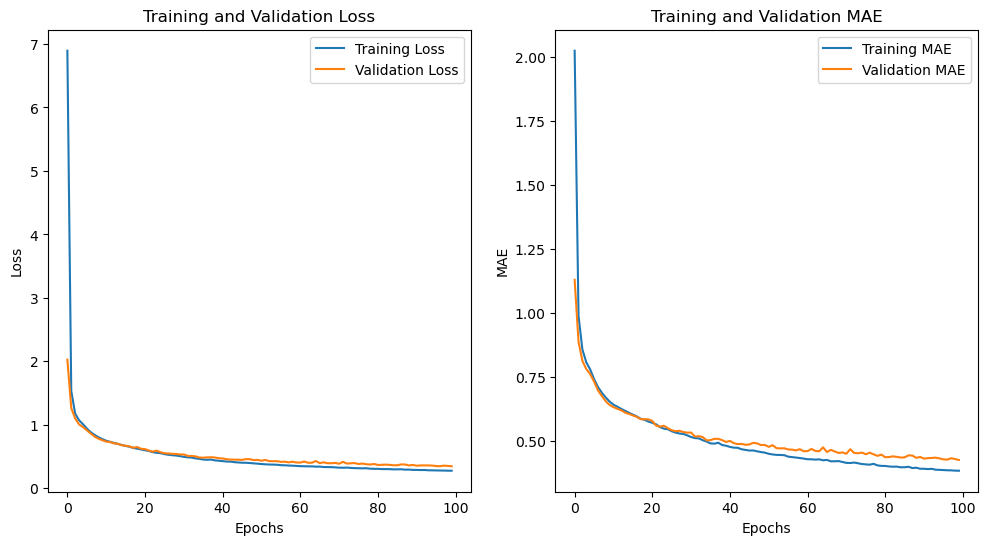

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - loss: 0.2766 - mae: 0.3817
Loss: 0.2872825860977173, MAE: 0.3883293569087982


In [26]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# モデルのハイパーパラメータ
input_dim = 247  # 入力次元数
output_dim = 100  # 出力次元数
hidden_units = 128  # 隠れ層のユニット数
epochs = 100  # 学習回数
batch_size = 32  # バッチサイズ

# ダミーデータの作成（本番環境では実データに置き換え）
# X_train: 入力データ, y_train: 出力データ
X_train = df_dropna
y_train = s

# モデルの構築
model = Sequential()

# 入力層と最初の隠れ層
model.add(Dense(hidden_units, input_dim=input_dim, activation='relu'))

# 追加の隠れ層（必要に応じて）
model.add(Dense(hidden_units, activation='relu'))

# 出力層
model.add(Dense(output_dim, activation='linear'))

# モデルのコンパイル
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# # モデルの学習
# model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)
# import matplotlib.pyplot as plt

# モデルの学習（先ほどのコードと同様）
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# 学習過程のlossとmaeの推移を取得
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mae']
val_mae = history.history['val_mae']

# 学習過程のグラフ表示
plt.figure(figsize=(12, 6))

# Lossのプロット
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# MAEのプロット
plt.subplot(1, 2, 2)
plt.plot(mae, label='Training MAE')
plt.plot(val_mae, label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()
# モデルの評価
loss, mae = model.evaluate(X_train, y_train)
print(f"Loss: {loss}, MAE: {mae}")


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step


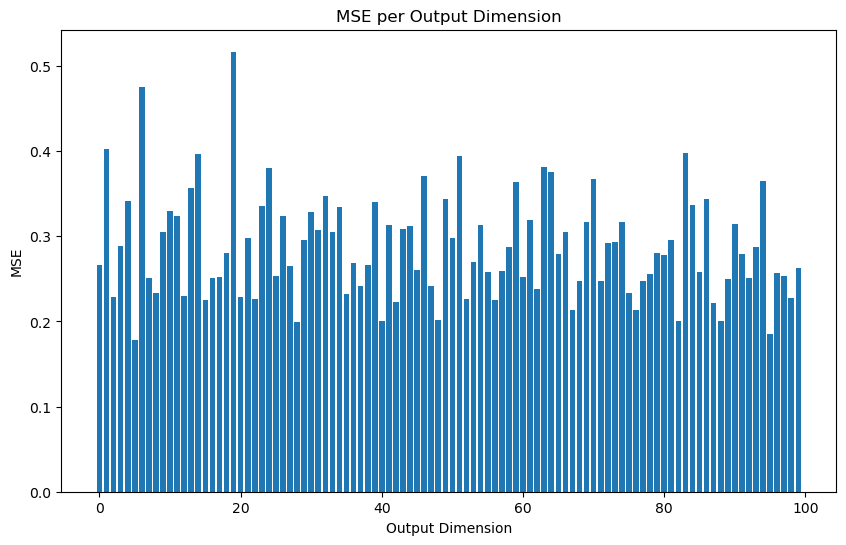

Best dimensions (lowest MSE): 好み1                       5
不快1                      95
個人的に好き1                  28
なぜ危険なのか1                 82
どのように改善したらよいか1           40
なるほど1                    88
自分には関係ない1                48
改善しようと思う1                67
これからは注意して運転しよう1          76
急ブレーキのたびに出たら不快1          87
たまに出てきても問題ない1            42
何度も出てきたら煩わしく1            56
ブレーキに関する内容1              15
自分の運転に対する内容1             22
何の操作に対する指摘かよくわからなかった1    52
分かりやすかった1                98
理解しやすかった1                 2
指摘内容の把握を流暢に1             20
把握は楽1                    12
難しかった1                   35
dtype: int64
MSE of best dimensions: なるほど1              0.178721
分かりやすかった5          0.185426
これからは注意して運転しよう2    0.199768
個人的に好き5            0.200027
好み3                0.200823
これからは注意して運転しよう5    0.200879
これからは注意して運転しよう3    0.201510
改善しようと思う4          0.213077
理解しやすかった4          0.213268
改善しようと思う5          0.221893
個人的に好き3            0.223243
理解しやすかった3          0.225406
分かりやすかった1          0.225751
個人的に好き2  

/var/folders/5r/3m3ng3v11j57dkl0psc9lphh0000gn/T/ipykernel_15242/2485858245.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("MSE of best dimensions:", mse_per_dim[best_dimensions])


In [27]:
# モデルの予測を実行
y_pred = model.predict(X_train)

# 各次元ごとの平均二乗誤差を計算
mse_per_dim = np.mean((y_train - y_pred) ** 2, axis=0)

# 各次元ごとのロスをプロット
plt.figure(figsize=(10, 6))
plt.bar(range(output_dim), mse_per_dim)
plt.title('MSE per Output Dimension')
plt.xlabel('Output Dimension')
plt.ylabel('MSE')
plt.show()

# # どの次元のロスが大きいかを確認する
# worst_dimensions = np.argsort(mse_per_dim)[-10:]  # ロスが大きい上位10次元
# print("Worst dimensions (highest MSE):", worst_dimensions)
# print("MSE of worst dimensions:", mse_per_dim[worst_dimensions])

#どの次元のロスが小さいかを確認する
best_dimensions = np.argsort(mse_per_dim)[:20]  # ロスが小さい上位10次元
print("Best dimensions (lowest MSE):", best_dimensions)
print("MSE of best dimensions:", mse_per_dim[best_dimensions])



# # ロスが大きい次元のデータをプロット
# plt.figure(figsize=(10, 6))
# for dim in worst_dimensions:
#     plt.plot(y_train.iloc[:, dim], label=f"True (dim={dim})")
#     plt.plot(y_pred[:, dim], label=f"Predicted (dim={dim})")
# plt.title('Worst Dimensions (highest MSE)')
# plt.xlabel('Sample')
# plt.ylabel('Value')
# plt.legend()
# plt.show()




In [28]:
mse_per_dim[0:30]

好み1                      0.266122
不快1                      0.402637
個人的に好き1                  0.228895
なぜ危険なのか1                 0.288685
どのように改善したらよいか1           0.341796
なるほど1                    0.178721
自分には関係ない1                0.475621
改善しようと思う1                0.250687
これからは注意して運転しよう1          0.233698
急ブレーキのたびに出たら不快1          0.305066
たまに出てきても問題ない1            0.329679
何度も出てきたら煩わしく1            0.324062
ブレーキに関する内容1              0.229488
自分の運転に対する内容1             0.357243
何の操作に対する指摘かよくわからなかった1    0.396409
分かりやすかった1                0.225751
理解しやすかった1                0.251324
指摘内容の把握を流暢に1             0.251792
把握は楽1                    0.279871
難しかった1                   0.516833
好み2                      0.229004
不快2                      0.298233
個人的に好き2                  0.225943
なぜ危険なのか2                 0.335449
どのように改善したらよいか2           0.380293
なるほど2                    0.252921
自分には関係ない2                0.323664
改善しようと思う2                0.264673
これからは注意して運転しよう2          0.199768
急ブレーキのたびに出たら不快

In [29]:
np.argsort(mse_per_dim)[-10:] 

たまに出てきても問題ない5            46
何度も出てきたら煩わしく5            64
ブレーキに関する内容5              24
自分の運転に対する内容5             63
何の操作に対する指摘かよくわからなかった5    51
分かりやすかった5                14
理解しやすかった5                83
指摘内容の把握を流暢に5              1
把握は楽5                     6
難しかった5                   19
dtype: int64

In [30]:
y_train

,好み1,不快1,個人的に好き1,なぜ危険なのか1,どのように改善したらよいか1,なるほど1,自分には関係ない1,改善しようと思う1,これからは注意して運転しよう1,急ブレーキのたびに出たら不快1,...,たまに出てきても問題ない5,何度も出てきたら煩わしく5,ブレーキに関する内容5,自分の運転に対する内容5,何の操作に対する指摘かよくわからなかった5,分かりやすかった5,理解しやすかった5,指摘内容の把握を流暢に5,把握は楽5,難しかった5
0,1,3,2,1,1,1,3,3,1,3,...,3,4,4,4,4,4,4,4,4,4
1,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,5,1,1,5,1,5,1,1,1,...,1,4,4,5,2,5,5,3,5,2
3,3,3,3,1,5,1,1,1,1,1,...,3,4,5,4,5,4,4,4,4,3
4,1,1,1,1,1,1,1,1,1,5,...,1,1,5,5,4,5,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,3,5,3,1,1,1,3,1,3,3,...,2,3,5,5,5,5,5,5,5,5
800,1,5,1,1,5,1,5,1,1,1,...,5,2,5,5,1,5,5,5,5,5
801,5,1,5,5,1,4,1,5,5,5,...,1,5,5,5,1,5,5,5,5,1
802,1,5,1,1,5,1,1,1,3,5,...,4,4,5,5,5,5,5,5,5,5


Epoch 1/1600


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.7587 - mae: 2.3562 - val_loss: 1.7705 - val_mae: 1.0520
Epoch 2/1600
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - loss: 1.5108 - mae: 0.9821 - val_loss: 1.2323 - val_mae: 0.8684
Epoch 3/1600
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - loss: 1.1614 - mae: 0.8531 - val_loss: 1.0529 - val_mae: 0.7921
Epoch 4/1600
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - loss: 1.0433 - mae: 0.7961 - val_loss: 0.9775 - val_mae: 0.7599
Epoch 5/1600
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step - loss: 0.9495 - mae: 0.7525 - val_loss: 0.9097 - val_mae: 0.7268
Epoch 6/1600
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - loss: 0.9004 - mae: 0.7268 - val_loss: 0.8530 - val_mae: 0.6967
Epoch 7/1600
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - loss: 0.8700 - mae: 0.7075 - val_loss: 0.8166 - val_mae: 0.6766
Epoch 8/1600
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - loss: 0.8424 - mae: 0.6935 - val_loss: 0.7820 - val_mae: 0.6616
Epoch 9/1600
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step -

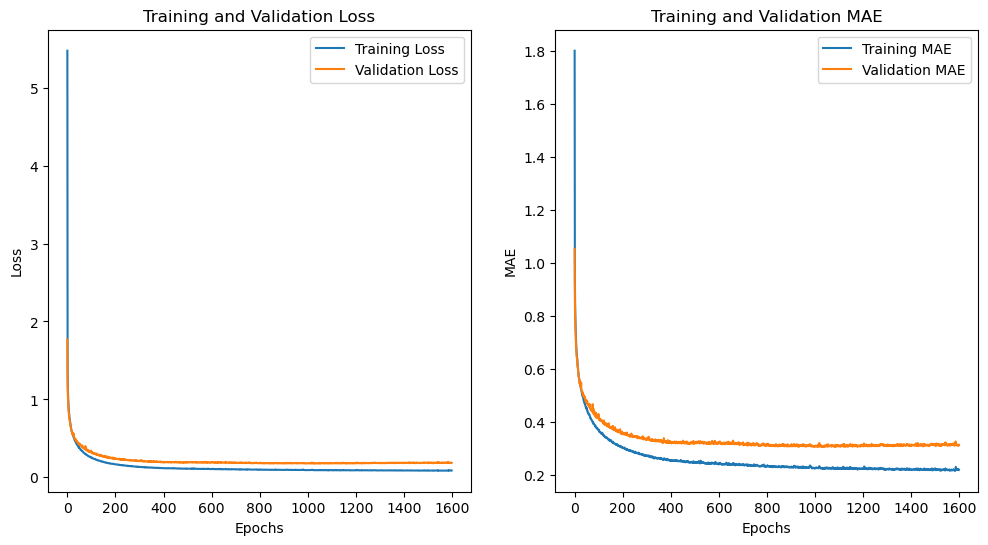

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step


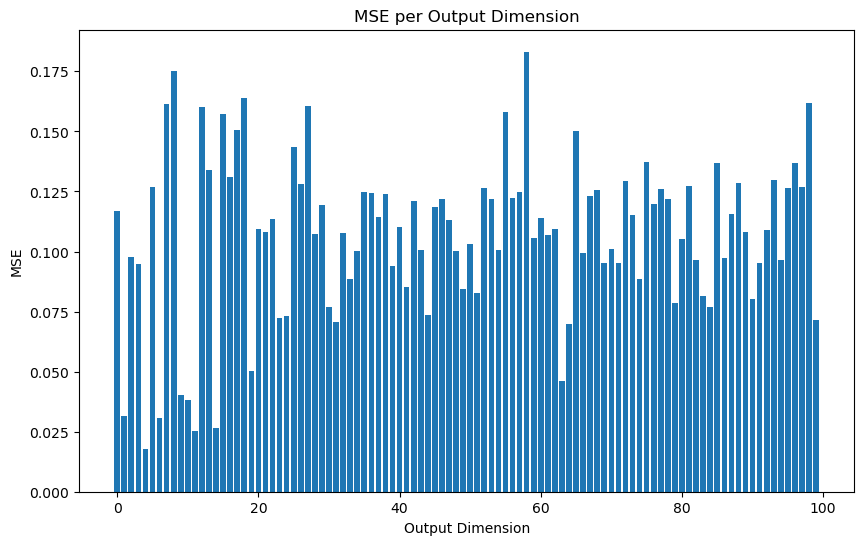

Best dimensions (lowest MSE): 好み1                       4
不快1                      11
個人的に好き1                  14
なぜ危険なのか1                  6
どのように改善したらよいか1            1
なるほど1                    10
自分には関係ない1                 9
改善しようと思う1                63
これからは注意して運転しよう1          19
急ブレーキのたびに出たら不快1          64
たまに出てきても問題ない1            31
何度も出てきたら煩わしく1            99
ブレーキに関する内容1              23
自分の運転に対する内容1             24
何の操作に対する指摘かよくわからなかった1    44
分かりやすかった1                84
理解しやすかった1                30
指摘内容の把握を流暢に1             79
把握は楽1                    90
難しかった1                   83
好み2                      51
不快2                      49
個人的に好き2                  41
なぜ危険なのか2                 74
どのように改善したらよいか2           33
なるほど2                    39
自分には関係ない2                 3
改善しようと思う2                91
これからは注意して運転しよう2          71
急ブレーキのたびに出たら不快2          69
dtype: int64
MSE of best dimensions: どのように改善したらよいか1           0.017809
何度も出てきたら煩わしく1            0.025074
何の操作に対する指摘かよくわからなかった1    

/var/folders/5r/3m3ng3v11j57dkl0psc9lphh0000gn/T/ipykernel_15242/4119519471.py:73: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("MSE of best dimensions:", mse_per_dim[best_dimensions])


In [33]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# モデルのハイパーパラメータ
input_dim = 247  # 入力次元数
output_dim = 100  # 出力次元数
hidden_units = 128  # 隠れ層のユニット数
epochs = 1600 # 学習回数
batch_size = 32  # バッチサイズ

# ダミーデータの作成（本番環境では実データに置き換え）
X_train = df_dropna
y_train = s

# モデルの構築
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_dim, activation='relu'))
model.add(Dense(hidden_units, activation='relu'))
model.add(Dense(output_dim, activation='linear'))

# モデルのコンパイル
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# モデルの学習
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# 学習過程のlossとmaeの推移を取得してプロット
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mae']
val_mae = history.history['val_mae']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(mae, label='Training MAE')
plt.plot(val_mae, label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()

# モデルの予測を実行
y_pred = model.predict(X_train)

# 各次元ごとの平均二乗誤差を計算
mse_per_dim = np.mean((y_train - y_pred) ** 2, axis=0)

# 各次元ごとのロスをプロット
plt.figure(figsize=(10, 6))
plt.bar(range(output_dim), mse_per_dim)
plt.title('MSE per Output Dimension')
plt.xlabel('Output Dimension')
plt.ylabel('MSE')
plt.show()

# ロスが小さい次元を出力
best_dimensions = np.argsort(mse_per_dim)[:30]  # ロスが小さい上位10次元
print("Best dimensions (lowest MSE):", best_dimensions)
print("MSE of best dimensions:", mse_per_dim[best_dimensions])


Epoch 1/300


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.5238 - mae: 2.7712 - val_loss: 2.3205 - val_mae: 1.1990
Epoch 2/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - loss: 1.7800 - mae: 1.0606 - val_loss: 1.2513 - val_mae: 0.8861
Epoch 3/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - loss: 1.2528 - mae: 0.8915 - val_loss: 1.0730 - val_mae: 0.8080
Epoch 4/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - loss: 1.0897 - mae: 0.8203 - val_loss: 1.0052 - val_mae: 0.7704
Epoch 5/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - loss: 1.0199 - mae: 0.7880 - val_loss: 0.9563 - val_mae: 0.7457
Epoch 6/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - loss: 0.9625 - mae: 0.7573 - val_loss: 0.9058 - val_mae: 0.7282
Epoch 7/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - loss: 0.9075 - mae: 0.7306 - val_loss: 0.8699 - val_mae: 0.7095
Epoch 8/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 0.8922 - mae: 0.7204 - val_loss: 0.8442 - val_mae: 0.6863
Epoch 9/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - loss: 

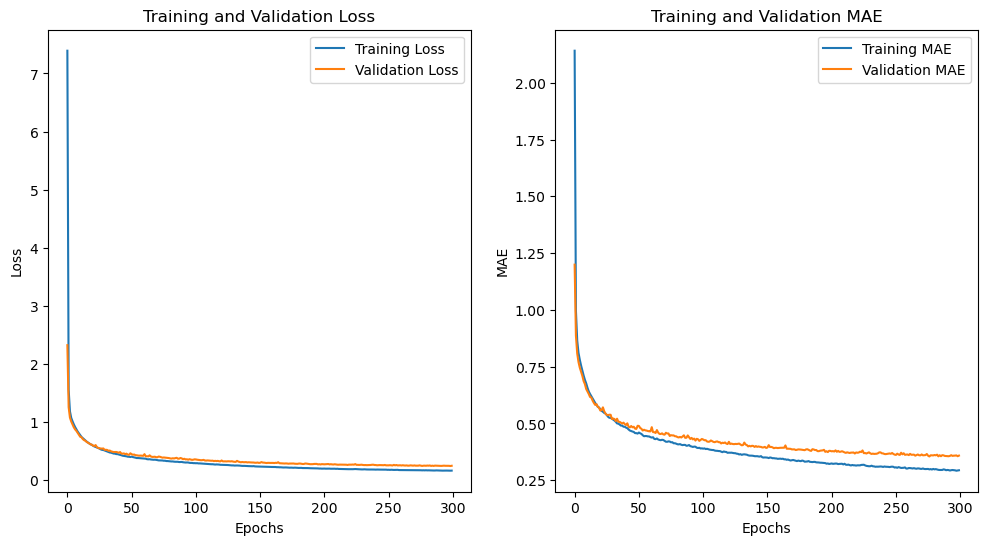

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step


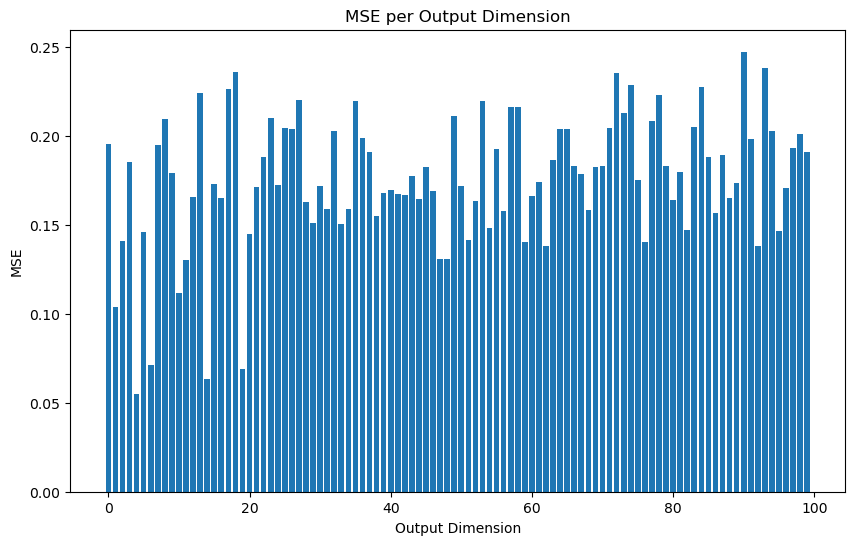

Best dimensions (lowest MSE): 好み1                       4
不快1                      14
個人的に好き1                  19
なぜ危険なのか1                  6
どのように改善したらよいか1            1
なるほど1                    10
自分には関係ない1                11
改善しようと思う1                47
これからは注意して運転しよう1          48
急ブレーキのたびに出たら不快1          92
たまに出てきても問題ない1            62
何度も出てきたら煩わしく1            59
ブレーキに関する内容1              76
自分の運転に対する内容1              2
何の操作に対する指摘かよくわからなかった1    51
分かりやすかった1                20
理解しやすかった1                 5
指摘内容の把握を流暢に1             95
把握は楽1                    82
難しかった1                   54
好み2                      33
不快2                      29
個人的に好き2                  38
なぜ危険なのか2                 86
どのように改善したらよいか2           56
なるほど2                    68
自分には関係ない2                31
改善しようと思う2                34
これからは注意して運転しよう2          28
急ブレーキのたびに出たら不快2          52
dtype: int64
MSE of best dimensions: どのように改善したらよいか1           0.055219
何の操作に対する指摘かよくわからなかった1    0.063670
難しかった1                   

/var/folders/5r/3m3ng3v11j57dkl0psc9lphh0000gn/T/ipykernel_15242/3961144140.py:73: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("MSE of best dimensions:", mse_per_dim[best_dimensions])


In [32]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# モデルのハイパーパラメータ
input_dim = 247  # 入力次元数
output_dim = 100  # 出力次元数
hidden_units = 128  # 隠れ層のユニット数
epochs = 300 # 学習回数
batch_size = 32  # バッチサイズ

# ダミーデータの作成（本番環境では実データに置き換え）
X_train = df_dropna
y_train = s

# モデルの構築
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_dim, activation='relu'))
model.add(Dense(hidden_units, activation='relu'))
model.add(Dense(output_dim, activation='linear'))

# モデルのコンパイル
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# モデルの学習
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# 学習過程のlossとmaeの推移を取得してプロット
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mae']
val_mae = history.history['val_mae']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(mae, label='Training MAE')
plt.plot(val_mae, label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()

# モデルの予測を実行
y_pred = model.predict(X_train)

# 各次元ごとの平均二乗誤差を計算
mse_per_dim = np.mean((y_train - y_pred) ** 2, axis=0)

# 各次元ごとのロスをプロット
plt.figure(figsize=(10, 6))
plt.bar(range(output_dim), mse_per_dim)
plt.title('MSE per Output Dimension')
plt.xlabel('Output Dimension')
plt.ylabel('MSE')
plt.show()

# ロスが小さい次元を出力
best_dimensions = np.argsort(mse_per_dim)[:30]  # ロスが小さい上位10次元
print("Best dimensions (lowest MSE):", best_dimensions)
print("MSE of best dimensions:", mse_per_dim[best_dimensions])


Epoch 1/300


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.9436 - mae: 2.5554 - val_loss: 1.8660 - val_mae: 1.0958
Epoch 2/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - loss: 1.6173 - mae: 1.0112 - val_loss: 1.2519 - val_mae: 0.8905
Epoch 3/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - loss: 1.2148 - mae: 0.8734 - val_loss: 1.1401 - val_mae: 0.8496
Epoch 4/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - loss: 1.1448 - mae: 0.8413 - val_loss: 1.0235 - val_mae: 0.7832
Epoch 5/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - loss: 1.0265 - mae: 0.7845 - val_loss: 0.9977 - val_mae: 0.7636
Epoch 6/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step - loss: 0.9747 - mae: 0.7631 - val_loss: 0.9477 - val_mae: 0.7534
Epoch 7/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - loss: 0.9177 - mae: 0.7382 - val_loss: 0.8833 - val_mae: 0.7165
Epoch 8/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - loss: 0.8879 - mae: 0.7192 - val_loss: 0.8388 - val_mae: 0.6992
Epoch 9/300
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - loss: 

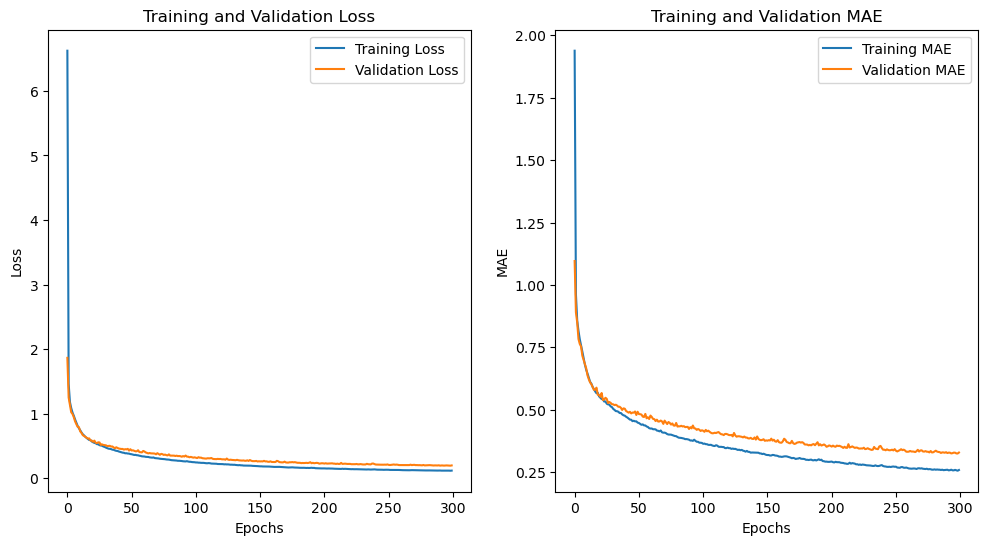

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step


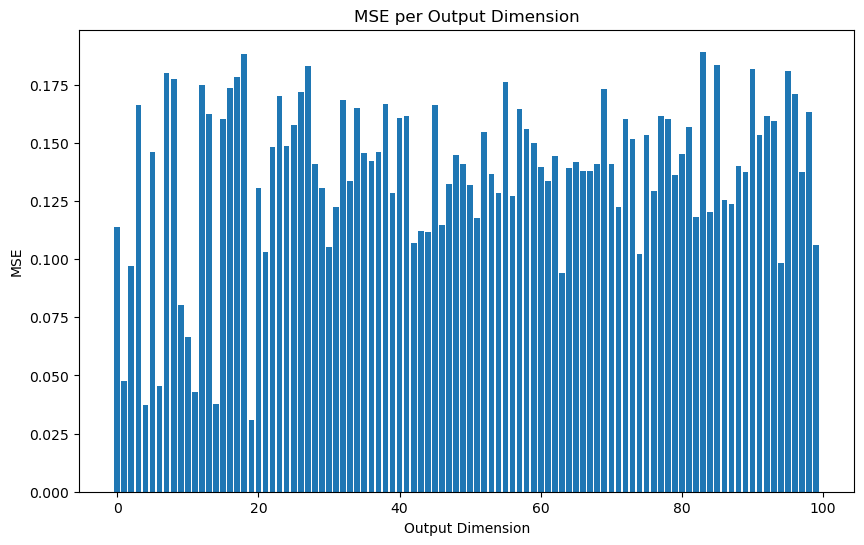

Best dimensions (lowest MSE): たまに出てきても問題ない5            55
何度も出てきたら煩わしく5             8
ブレーキに関する内容5              17
自分の運転に対する内容5              7
何の操作に対する指摘かよくわからなかった5    95
分かりやすかった5                90
理解しやすかった5                27
指摘内容の把握を流暢に5             85
把握は楽5                    18
難しかった5                   83
dtype: int64
MSE of best dimensions: 分かりやすかった3          0.176237
これからは注意して運転しよう1    0.177425
指摘内容の把握を流暢に1       0.178323
改善しようと思う1          0.180089
分かりやすかった5          0.181046
たまに出てきても問題ない5      0.181699
改善しようと思う2          0.183219
なるほど5              0.183727
把握は楽1              0.188098
なぜ危険なのか5           0.189234
dtype: float64


/var/folders/5r/3m3ng3v11j57dkl0psc9lphh0000gn/T/ipykernel_15242/59817509.py:73: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("MSE of best dimensions:", mse_per_dim[best_dimensions])


In [36]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# モデルのハイパーパラメータ
input_dim = 247  # 入力次元数
output_dim = 100  # 出力次元数
hidden_units = 128  # 隠れ層のユニット数
epochs = 300 # 学習回数
batch_size = 32  # バッチサイズ

# ダミーデータの作成（本番環境では実データに置き換え）
X_train = df_dropna
y_train = s

# モデルの構築
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_dim, activation='relu'))
model.add(Dense(hidden_units, activation='relu'))
model.add(Dense(output_dim, activation='linear'))

# モデルのコンパイル
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# モデルの学習
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# 学習過程のlossとmaeの推移を取得してプロット
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mae']
val_mae = history.history['val_mae']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(mae, label='Training MAE')
plt.plot(val_mae, label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()

# モデルの予測を実行
y_pred = model.predict(X_train)

# 各次元ごとの平均二乗誤差を計算
mse_per_dim = np.mean((y_train - y_pred) ** 2, axis=0)

# 各次元ごとのロスをプロット
plt.figure(figsize=(10, 6))
plt.bar(range(output_dim), mse_per_dim)
plt.title('MSE per Output Dimension')
plt.xlabel('Output Dimension')
plt.ylabel('MSE')
plt.show()

# ロスが小さい次元を出力
best_dimensions = np.argsort(mse_per_dim)[90:100]  # ロスが小さい上位10次元
print("Best dimensions (lowest MSE):", best_dimensions)
print("MSE of best dimensions:", mse_per_dim[best_dimensions])


Epoch 1/500


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.6880 - mae: 2.4990 - val_loss: 1.8062 - val_mae: 1.0785
Epoch 2/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - loss: 1.5559 - mae: 0.9991 - val_loss: 1.2398 - val_mae: 0.8759
Epoch 3/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1705 - mae: 0.8566 - val_loss: 1.0562 - val_mae: 0.8040
Epoch 4/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0428 - mae: 0.7998 - val_loss: 1.0122 - val_mae: 0.7838
Epoch 5/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9893 - mae: 0.7735 - val_loss: 0.9578 - val_mae: 0.7637
Epoch 6/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - loss: 0.9629 - mae: 0.7610 - val_loss: 0.8960 - val_mae: 0.7265
Epoch 7/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9053 - mae: 0.7298 - val_loss: 0.8718 - val_mae: 0.7067
Epoch 8/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8453 - mae: 0.7013 - val_loss: 0.8182 - val_mae: 0.6864
Epoch 9/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7884 - mae:

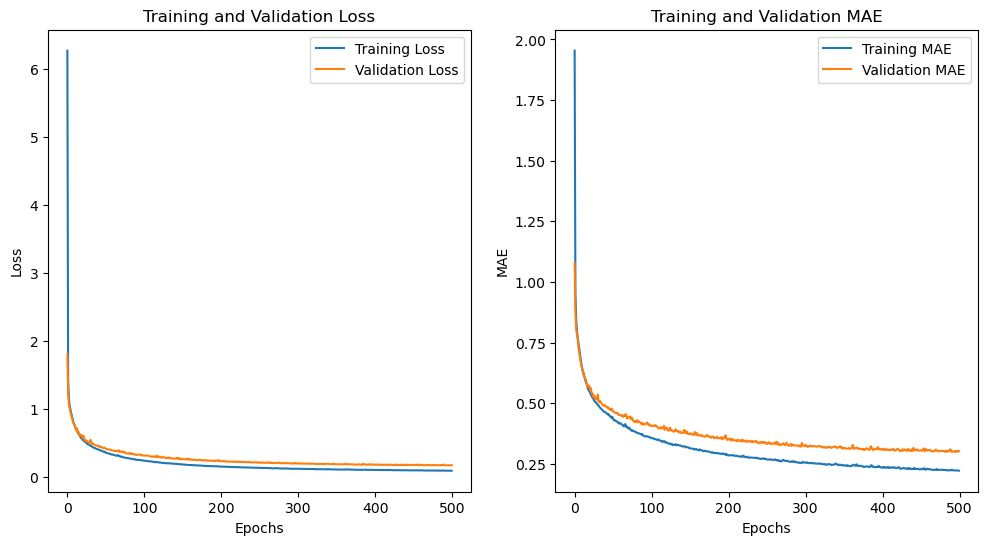

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step


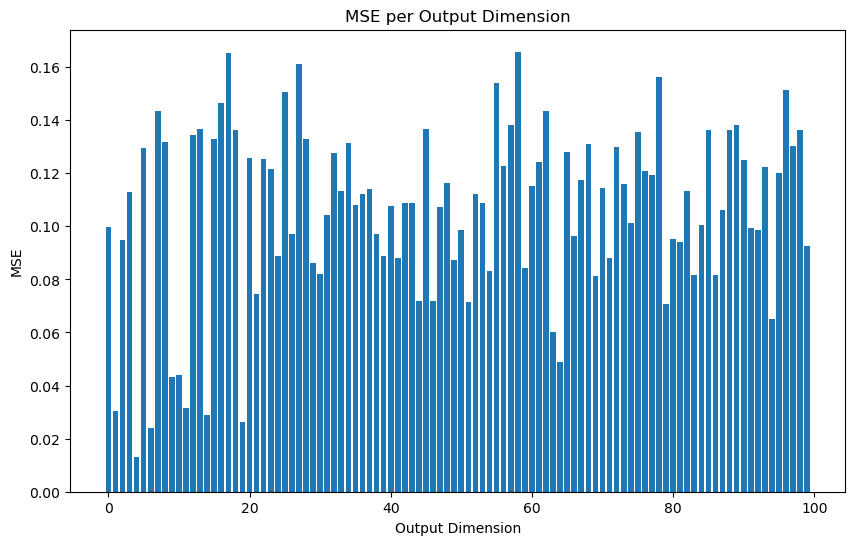

Best dimensions (lowest MSE): 好み1                       4
不快1                       6
個人的に好き1                  19
なぜ危険なのか1                 14
どのように改善したらよいか1            1
なるほど1                    11
自分には関係ない1                 9
改善しようと思う1                10
これからは注意して運転しよう1          64
急ブレーキのたびに出たら不快1          63
たまに出てきても問題ない1            94
何度も出てきたら煩わしく1            79
ブレーキに関する内容1              51
自分の運転に対する内容1             46
何の操作に対する指摘かよくわからなかった1    44
分かりやすかった1                21
理解しやすかった1                69
指摘内容の把握を流暢に1             83
把握は楽1                    86
難しかった1                   30
好み2                      54
不快2                      59
個人的に好き2                  29
なぜ危険なのか2                 49
どのように改善したらよいか2           41
なるほど2                    71
自分には関係ない2                24
改善しようと思う2                39
これからは注意して運転しよう2          99
急ブレーキのたびに出たら不快2          81
dtype: int64
MSE of best dimensions: どのように改善したらよいか1           0.012975
自分には関係ない1                0.024165
難しかった1                   

/var/folders/5r/3m3ng3v11j57dkl0psc9lphh0000gn/T/ipykernel_15242/821562151.py:73: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("MSE of best dimensions:", mse_per_dim[best_dimensions])


In [34]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# モデルのハイパーパラメータ
input_dim = 247  # 入力次元数
output_dim = 100  # 出力次元数
hidden_units = 128  # 隠れ層のユニット数
epochs = 500 # 学習回数
batch_size = 32  # バッチサイズ

# ダミーデータの作成（本番環境では実データに置き換え）
X_train = df_dropna
y_train = s

# モデルの構築
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_dim, activation='relu'))
model.add(Dense(hidden_units, activation='relu'))
model.add(Dense(output_dim, activation='linear'))

# モデルのコンパイル
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# モデルの学習
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# 学習過程のlossとmaeの推移を取得してプロット
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mae']
val_mae = history.history['val_mae']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(mae, label='Training MAE')
plt.plot(val_mae, label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()

# モデルの予測を実行
y_pred = model.predict(X_train)

# 各次元ごとの平均二乗誤差を計算
mse_per_dim = np.mean((y_train - y_pred) ** 2, axis=0)

# 各次元ごとのロスをプロット
plt.figure(figsize=(10, 6))
plt.bar(range(output_dim), mse_per_dim)
plt.title('MSE per Output Dimension')
plt.xlabel('Output Dimension')
plt.ylabel('MSE')
plt.show()

# ロスが小さい次元を出力
best_dimensions = np.argsort(mse_per_dim)[:30]  # ロスが小さい上位10次元
print("Best dimensions (lowest MSE):", best_dimensions)
print("MSE of best dimensions:", mse_per_dim[best_dimensions])


In [ ]:
mse_per_dim[0:10]
mse_per_dim[best_dimensions][0:10]

best_dimensions
mse_per_dim[best_dimensions]

/var/folders/5r/3m3ng3v11j57dkl0psc9lphh0000gn/T/ipykernel_46301/2940674475.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mse_per_dim[best_dimensions][0:10]
/var/folders/5r/3m3ng3v11j57dkl0psc9lphh0000gn/T/ipykernel_46301/2940674475.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mse_per_dim[best_dimensions]


なるほど1              0.157656
分かりやすかった5          0.169591
理解しやすかった4          0.174875
これからは注意して運転しよう5    0.185552
これからは注意して運転しよう4    0.191460
これからは注意して運転しよう3    0.194783
ブレーキに関する内容3        0.196620
改善しようと思う4          0.199763
好み4                0.205809
分かりやすかった4          0.206958
dtype: float64

In [8]:
#all_drop_exp.csvを読み込む
df_all_drop_exp = pd.read_csv('all_drop_exp.csv')
df_all_drop_exp[10:14]

,Unnamed: 0,d1,d2,d3,d4,d5,w1,w2,w3,w4,...,c3,c4,c5,c6,p,none_s,image_s,announce_s,image_sound_s,image_announce_s
10,13,3.5283,2.3139,3.2333,4.18517,5.23090,22.70920,15.76695,15.72699,15.66040,...,30,19,23,15,3,2.7333,2.9444,3.0000,3.0000,3.2889
11,14,3.2080,2.3115,7.6254,5.64190,7.59495,31.81118,27.72612,21.77918,20.69237,...,22,19,14,10,4,1.9778,3.5333,2.8556,3.0000,3.3889
12,15,7.1979,3.1578,5.4769,4.67814,7.07351,25.68948,17.77610,16.78791,17.17793,...,32,20,13,14,3,3.0000,3.0556,3.1111,3.6111,3.3778
13,16,4.7634,1.7512,3.5468,3.75658,5.80966,28.51113,12.42138,12.92084,10.67754,...,40,16,16,12,5,2.5778,3.3222,3.5444,3.3111,3.5333


In [9]:
df_all_drop_s = df_all_drop_exp[['none_s', 'image_s','announce_s', 'image_sound_s', 'image_announce_s']]
new_column_names = {'none_s': '提示なし','image_s': '画像のみ', 'announce_s': '音声のみ','image_sound_s': '画像+報知音', 'image_announce_s': '画像+音声'}

df_all_drop_s = df_all_drop_s.rename(columns=new_column_names)
#df_all_drop_sに関して，'none_s', 'image_s','announce_s', 'image_sound_s', 'image_announce_s'の最大値を持つカラム名をカラムとして追加
df_all_drop_s_max = df_all_drop_s.idxmax(axis=1)
df_all_drop_s_max.describe()

count       684
unique        5
top       画像+音声
freq        271
dtype: object

In [10]:
#df_all_drop_s_maxの要素の個数をカウント
df_all_drop_s_max_count = df_all_drop_s_max.value_counts()
df_all_drop_s_max_count

画像+音声     271
音声のみ      202
画像+報知音    108
画像のみ       90
提示なし       13
Name: count, dtype: int64

In [11]:
#画像のみの人を表示
df_image = df_all_drop_s[df_all_drop_s_max == '画像のみ']
df_image

,提示なし,画像のみ,音声のみ,画像+報知音,画像+音声
11,1.9778,3.5333,2.8556,3.0000,3.3889
16,2.3333,4.4333,3.6667,4.3222,4.2111
18,2.4667,3.6222,3.1222,3.1222,3.5889
28,3.0444,3.7111,3.3000,3.3000,3.1778
30,3.2667,3.4556,3.2444,2.6111,3.3222
...,...,...,...,...,...
624,3.7222,3.9444,3.6667,3.2444,3.7778
634,1.9667,4.8889,4.2667,4.1778,4.7778
643,2.4667,4.7778,4.7667,3.0000,4.7222
677,2.3333,4.4556,3.9444,4.0889,4.1000


In [12]:
#df_all_drop_s_maxをone-hotエンコーディング
df_all_drop_s_max_one_hot = pd.get_dummies(df_all_drop_s_max).astype(int)
df_all_drop_s_max_one_hot

,提示なし,画像+報知音,画像+音声,画像のみ,音声のみ
0,0,0,0,0,1
1,0,0,1,0,0
2,0,0,0,0,1
3,0,0,1,0,0
4,0,0,1,0,0
...,...,...,...,...,...
679,0,0,1,0,0
680,1,0,0,0,0
681,0,0,0,0,1
682,0,0,0,1,0


In [13]:
df_all_drop_exp.columns

Index(['Unnamed: 0', 'd1', 'd2', 'd3', 'd4', 'd5', 'w1', 'w2', 'w3', 'w4',
       'w5', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'p', 'none_s', 'image_s',
       'announce_s', 'image_sound_s', 'image_announce_s'],
      dtype='object')

In [14]:
# 特徴量とターゲット変数の設定
features = ['d1', 'd2', 'd3', 'd4', 'd5', 'w1', 'w2', 'w3', 'w4', 'w5', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'p']
# target = ['none_s', 'image_s','announce_s', 'image_sound_s', 'image_announce_s']  

# 特徴量とターゲットの抽出
X = df_all_drop_exp[features]
y = df_all_drop_s_max_one_hot

In [15]:
#yの要素の個数をカウント
y_count = y.sum()  
y_count


提示なし       13
画像+報知音    108
画像+音声     271
画像のみ       90
音声のみ      202
dtype: int64

In [16]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train

,提示なし,画像+報知音,画像+音声,画像のみ,音声のみ
439,0,0,0,0,1
257,0,0,1,0,0
558,0,0,1,0,0
587,0,0,0,0,1
18,0,0,0,1,0
...,...,...,...,...,...
71,0,1,0,0,0
106,0,0,1,0,0
270,0,1,0,0,0
435,0,0,0,0,1


In [17]:








# 特徴量の標準化を含むパイプラインの構築
scaler = StandardScaler()
clf = RandomForestClassifier(n_estimators=100, random_state=42)

pipeline = Pipeline(steps=[
    ('scaler', scaler),
    ('classifier', clf)
])

# モデルのトレーニング
pipeline.fit(X_train, y_train)

# 予測と評価
y_pred = pipeline.predict(X_test)

# # y_test と y_pred を再度エンコード解除して比較
# y_test_labels = encoder.inverse_transform(y_test)
# y_pred_labels = encoder.inverse_transform(y_pred)

# print(classification_report(y_test_labels, y_pred_labels))
# print('Accuracy:', accuracy_score(y_test_labels, y_pred_labels))

print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        18
           2       0.56      0.15      0.24        60
           3       0.00      0.00      0.00        16
           4       0.00      0.00      0.00        42

   micro avg       0.41      0.07      0.11       137
   macro avg       0.11      0.03      0.05       137
weighted avg       0.25      0.07      0.10       137
 samples avg       0.07      0.07      0.07       137

Accuracy: 0.06569343065693431


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


参考文献　機械学習：https://qiita.com/hikaru_/items/3d64af35769235471d9c

In [18]:
# 特徴量とターゲット変数の設定
features = ['d1', 'd2', 'd3', 'd4', 'd5', 'w1', 'w2', 'w3', 'w4', 'w5', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'p']
# target = ['none_s', 'image_s','announce_s', 'image_sound_s', 'image_announce_s']  

# 特徴量とターゲットの抽出
X = df_all_drop_exp[features]
Y = df_all_drop_s_max

#ここから学習用データとテスト用データに分ける。random_stateは乱数を固定
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

In [19]:
df_all_drop_s_max

0       音声のみ
1      画像+音声
2       音声のみ
3      画像+音声
4      画像+音声
       ...  
679    画像+音声
680     提示なし
681     音声のみ
682     画像のみ
683     音声のみ
Length: 684, dtype: object

In [20]:
# # k-近傍法（k-NN）
# from sklearn.neighbors import KNeighborsClassifier

# #k-NNインスタンス。今回は3個で多数決。3の値を変更して色々試すと〇
# model = KNeighborsClassifier(n_neighbors=3)
# #学習モデル構築。引数に訓練データの特徴量と、それに対応したラベル
# model.fit(X_train, y_train)

# # .scoreで正解率を算出。
# print("train score:",model.score(X_train,y_train))
# print("test score:",model.score(X_test,y_test))

In [21]:
# 決定木
from sklearn.tree import DecisionTreeClassifier

# 決定木インスタンス(木の深さ3)
model = DecisionTreeClassifier(max_depth=3)
#学習モデル構築。引数に訓練データの特徴量と、それに対応したラベル
model.fit(X_train, y_train)

# .scoreで正解率を算出。
print("train score:",model.score(X_train,y_train))
print("test score:",model.score(X_test,y_test))

train score: 0.46393762183235865
test score: 0.36257309941520466


In [22]:
# サポートベクターマシン（SVM）
from sklearn.svm import LinearSVC

# SVMインスタンス
model = LinearSVC()
#学習モデル構築。引数に訓練データの特徴量と、それに対応したラベル
model.fit(X_train, y_train)

# .scoreで正解率を算出。
print("train score:",model.score(X_train,y_train))
print("test score:",model.score(X_test,y_test))

train score: 0.39766081871345027
test score: 0.391812865497076


/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [23]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# 特徴量とターゲット変数の設定
features = ['d1', 'd2', 'd3', 'd4', 'd5', 'w1', 'w2', 'w3', 'w4', 'w5', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'p']

# 特徴量とターゲットの抽出
X = df_all_drop_exp[features]
Y = df_all_drop_s_max

# # ターゲットを数値ラベルに変換
# label_encoder = LabelEncoder()
# Y = label_encoder.fit_transform(Y)

# データを訓練用とテスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# 特徴量を標準化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SVMインスタンス
model = LinearSVC(max_iter=10000)

#グリッドサーチ
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 最適なパラメータを表示
print(f'Best parameters: {grid_search.best_params_}')






/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best parameters: {'C': 0.001}


/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


train score: 0.43875685557586835
test score: 0.3284671532846715
              precision    recall  f1-score   support

        提示なし       0.00      0.00      0.00         3
      画像+報知音       0.17      0.11      0.13        19
       画像+音声       0.35      0.61      0.45        51
        画像のみ       0.00      0.00      0.00        15
        音声のみ       0.35      0.24      0.29        49

    accuracy                           0.33       137
   macro avg       0.17      0.19      0.17       137
weighted avg       0.28      0.33      0.29       137



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


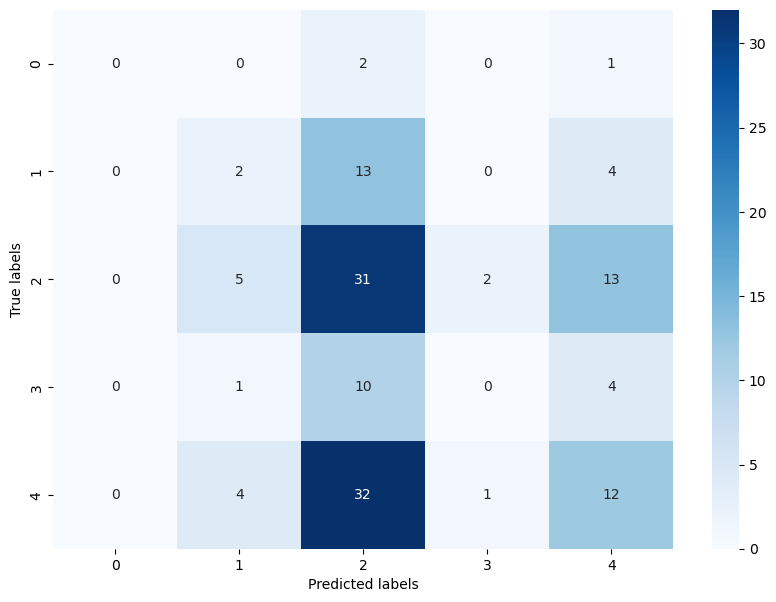

In [24]:
#最適なパラメータを使ってモデルを再構築
model = LinearSVC(C=0.001, max_iter=10000)
model.fit(X_train, y_train)

# .scoreで正解率を算出。
print("train score:",model.score(X_train,y_train))
print("test score:",model.score(X_test,y_test))

#confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm =confusion_matrix(y_test, y_pred)

#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))



# ヒートマップの描画
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# #特徴量の重要度
# importances = model.coef_
# importances = importances.reshape(-1)
# indices = np.argsort(importances)

# plt.figure(figsize=(10, 7))
# plt.barh(range(len(importances)), importances[indices], align='center')
# plt.yticks(range(len(importances)), np.array(features)[indices])
# plt.show()

# # 特徴量の重要度を表示
# importances = model.coef_
# importances = importances.reshape(-1)
# indices = np.argsort(importances)

# for i in range(len(importances)):
#     print(f'{features[i]}: {importances[i]}')
    

In [25]:
#AUC曲線
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# ターゲットを数値ラベルに変換
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

# ターゲットをone-hotエンコーディング
Y = label_binarize(Y, classes=[0, 1, 2, 3, 4])
n_classes = Y.shape[1]

# データを訓練用とテスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# 特徴量を標準化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SVMインスタンス
model = LinearSVC(C=0.001, max_iter=10000)

# OneVsRestClassifierで多クラス分類
classifier = OneVsRestClassifier(model)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# ROC曲線を描画
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 7))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

# # 特徴量の重要度を表示
# importances = model.coef_
# importances = importances.reshape(-1)
# indices = np.argsort(importances)

# for i in range(len(importances)):
#     print(f'{features[i]}: {importances[i]}')

NameError: name 'LabelEncoder' is not defined

In [ ]:
#xgboostを使用
import xgboost as xgb
from sklearn.metrics import accuracy_score

# 特徴量とターゲット変数の設定
features = ['d1', 'd2', 'd3', 'd4', 'd5', 'w1', 'w2', 'w3', 'w4', 'w5', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'p']

# 特徴量とターゲットの抽出
X = df_all_drop_exp[features]
Y = df_all_drop_s_max

# ターゲットを数値ラベルに変換
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

# データを訓練用とテスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# モデルの構築
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# 予測
y_pred = model.predict(X_test)

# 正解率の算出
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

#混同行列
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#ラベルのエンコードを元に戻す
y_test_labels = label_encoder.inverse_transform(y_test)
y_pred_labels = label_encoder.inverse_transform(y_pred)

#各ラベルの値を確認
print(label_encoder.classes_)


Accuracy: 0.29927007299270075
[[ 0  0  2  1  0]
 [ 0  2 10  0  7]
 [ 0  4 27  2 18]
 [ 0  1 11  1  2]
 [ 0  3 32  3 11]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.20      0.11      0.14        19
           2       0.33      0.53      0.41        51
           3       0.14      0.07      0.09        15
           4       0.29      0.22      0.25        49

    accuracy                           0.30       137
   macro avg       0.19      0.19      0.18       137
weighted avg       0.27      0.30      0.27       137

['提示なし' '画像+報知音' '画像+音声' '画像のみ' '音声のみ']


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#パラメータの調整
from sklearn.model_selection import GridSearchCV

# ハイパーパラメータの設定
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200]
}

# グリッドサーチ
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 最適なパラメータを表示
print(f'Best parameters: {grid_search.best_params_}')

#最適なパラメータを使ってモデルを再構築
model = xgb.XGBClassifier(**grid_search.best_params_)
model.fit(X_train, y_train)

# 予測
y_pred = model.predict(X_test)

# 正解率の算出
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

#混同行列
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,target_names=label_encoder.classes_))


Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Accuracy: 0.32116788321167883
[[ 0  0  3  0  0]
 [ 0  0 12  0  7]
 [ 0  4 35  1 11]
 [ 0  0 12  0  3]
 [ 0  2 37  1  9]]
              precision    recall  f1-score   support

        提示なし       0.00      0.00      0.00         3
      画像+報知音       0.00      0.00      0.00        19
       画像+音声       0.35      0.69      0.47        51
        画像のみ       0.00      0.00      0.00        15
        音声のみ       0.30      0.18      0.23        49

    accuracy                           0.32       137
   macro avg       0.13      0.17      0.14       137
weighted avg       0.24      0.32      0.26       137



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [182]:
#混同行列
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,target_names=label_encoder.classes_))


[[ 0  0  3  0  0]
 [ 0  0 12  0  7]
 [ 0  4 35  1 11]
 [ 0  0 12  0  3]
 [ 0  2 37  1  9]]
              precision    recall  f1-score   support

        提示なし       0.00      0.00      0.00         3
      画像+報知音       0.00      0.00      0.00        19
       画像+音声       0.35      0.69      0.47        51
        画像のみ       0.00      0.00      0.00        15
        音声のみ       0.30      0.18      0.23        49

    accuracy                           0.32       137
   macro avg       0.13      0.17      0.14       137
weighted avg       0.24      0.32      0.26       137



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/opt/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 25552 (\N{CJK UNIFIED IDEOGRAPH-63D0}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 12394 (\N{HIRAGANA LETTER NA}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 12375 (\N{HIRAGANA LETTER SI}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 30011 (\N{CJK UNIFIED IDEOGRAPH-753B}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 20687 (\N{CJK UNIFIED IDEOGRAPH-50CF}) missing from current font.
  fig.canvas.dra

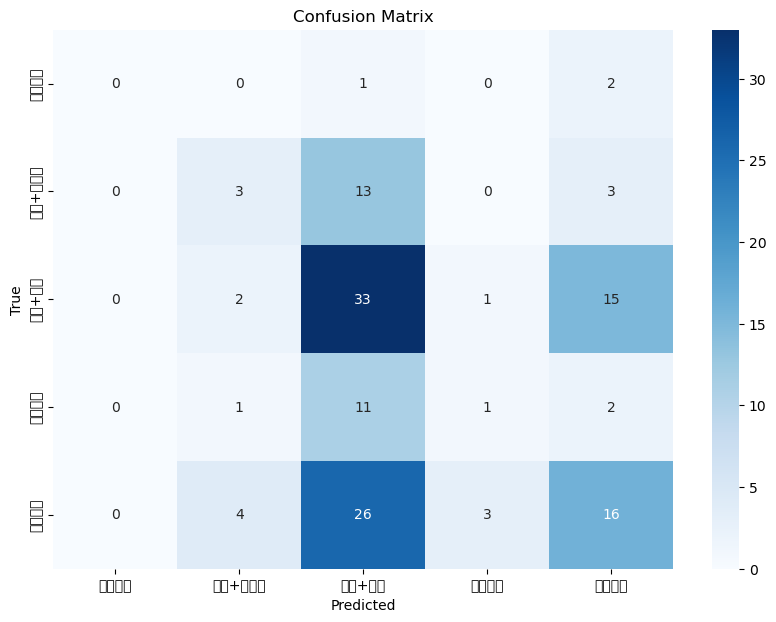

In [183]:

# 混同行列のプロット
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [184]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# 特徴量とターゲット変数の設定
features = ['d1', 'd2', 'd3', 'd4', 'd5', 'w1', 'w2', 'w3', 'w4', 'w5', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'p']

# 特徴量とターゲットの抽出
X = df_all_drop_exp[features]
Y = df_all_drop_s_max

# # ターゲットを数値ラベルに変換
# label_encoder = LabelEncoder()
# Y = label_encoder.fit_transform(Y)

# データを訓練用とテスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# 特徴量を標準化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SVMインスタンス
model = LinearSVC(max_iter=10000)

#グリッドサーチ
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 最適なパラメータを表示
print(f'Best parameters: {grid_search.best_params_}')




/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best parameters: {'C': 0.001}


/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


参考文献　グリッドサーチ：https://qiita.com/WealthyFirst/items/c81f7cea72a44a7bfd3a

In [185]:
# tuned_parameters = [
#     {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
#     {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.001, 0.0001]},
#     {'C': [1, 10, 100, 1000], 'kernel': ['poly'], 'degree': [2, 3, 4], 'gamma': [0.001, 0.0001]},
#     {'C': [1, 10, 100, 1000], 'kernel': ['sigmoid'], 'gamma': [0.001, 0.0001]}
#     ]
# score = 'f1'
# clf = GridSearchCV(
#     SVC(), # 識別器
#     tuned_parameters, # 最適化したいパラメータセット 
#     cv=5, # 交差検定の回数
#     scoring='%s_weighted' % score ) # モデルの評価関数の指定

In [186]:
# クロスバリデーションでモデルの評価
scores = cross_val_score(model, X_train, y_train, cv=5)

print(f'Cross-validation scores: {scores}')
print(f'Average cross-validation score: {scores.mean()}')

# 最終的なモデルの学習
model.fit(X_train, y_train)

# 訓練データとテストデータでのスコアを表示
print("train score:", model.score(X_train, y_train))
print("test score:", model.score(X_test, y_test))

Cross-validation scores: [0.37272727 0.30909091 0.3853211  0.34862385 0.3853211 ]
Average cross-validation score: 0.36021684737281073
train score: 0.43144424131627057
test score: 0.35766423357664234


In [187]:
# !pip install tensorflow

In [188]:
X_train.shape[1]

17

In [189]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# ターゲットを数値ラベルに変換
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

# データを訓練用とテスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# 特徴量を標準化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# モデルの定義
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))

# モデルのコンパイル
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# モデルの訓練
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)



# モデルの評価
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

Epoch 1/50


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1273 - loss: 1.7402 - val_accuracy: 0.2636 - val_loss: 1.5621
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3231 - loss: 1.5347 - val_accuracy: 0.3182 - val_loss: 1.5236
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3998 - loss: 1.4254 - val_accuracy: 0.3455 - val_loss: 1.5212
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - accuracy: 0.4366 - loss: 1.3611 - val_accuracy: 0.3455 - val_loss: 1.5215
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4055 - loss: 1.3599 - val_accuracy: 0.3091 - val_loss: 1.5234
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4300 - loss: 1.3172 - val_accuracy: 0.3182 - val_loss: 1.5259
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4706 - loss: 1.2848 - val_accuracy: 0.3364 - val_loss: 1.5221
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4426 - loss: 1.2738 - val_accuracy: 0.3091 - val_loss: 1.5239
E

Epoch 1/200


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2471 - loss: 1.6792 - val_accuracy: 0.1727 - val_loss: 1.6404
Epoch 2/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3096 - loss: 1.5503 - val_accuracy: 0.2182 - val_loss: 1.5665
Epoch 3/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3867 - loss: 1.4419 - val_accuracy: 0.2545 - val_loss: 1.5324
Epoch 4/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4030 - loss: 1.3790 - val_accuracy: 0.2727 - val_loss: 1.5134
Epoch 5/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - accuracy: 0.4092 - loss: 1.3344 - val_accuracy: 0.2636 - val_loss: 1.5040
Epoch 6/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4215 - loss: 1.3321 - val_accuracy: 0.2545 - val_loss: 1.5012
Epoch 7/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4134 - loss: 1.2948 - val_accuracy: 0.2727 - val_loss: 1.5014
Epoch 8/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - accuracy: 0.4197 - loss: 1.3043 - val_accuracy: 0.2727 - val_loss:

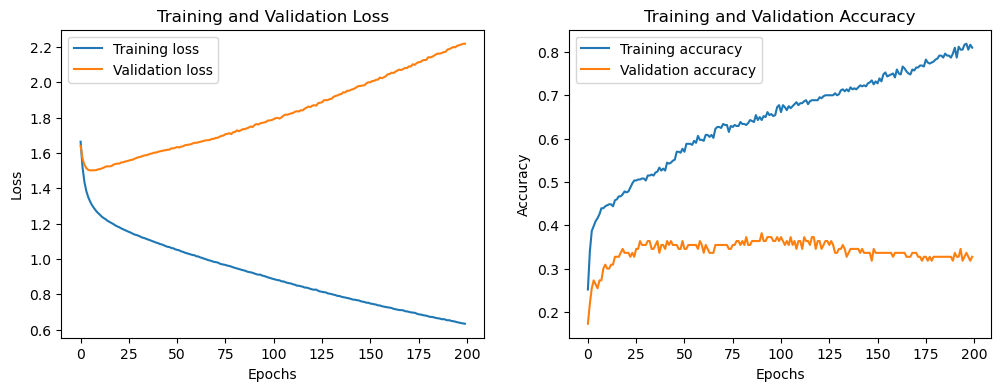

In [190]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# 特徴量とターゲット変数の設定
features = ['d1', 'd2', 'd3', 'd4', 'd5', 'w1', 'w2', 'w3', 'w4', 'w5', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'p']

# 特徴量とターゲットの抽出
X = df_all_drop_exp[features]
Y = df_all_drop_s_max

# ターゲットを数値ラベルに変換
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

# データを訓練用とテスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# 特徴量を標準化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# モデルの定義
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
# model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))

# モデルのコンパイル
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 訓練パラメータ
epochs = 200
batch_size = 32

# モデルの訓練
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# モデルの評価
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

# 学習過程のプロット
# 訓練と検証の損失をプロット
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# 訓練と検証の精度をプロット
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()


Epoch 1/200


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2287 - loss: 1.7178 - val_accuracy: 0.2045 - val_loss: 1.5824
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3178 - loss: 1.5849 - val_accuracy: 0.3409 - val_loss: 1.5130
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3908 - loss: 1.4702 - val_accuracy: 0.3864 - val_loss: 1.4810
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3748 - loss: 1.4457 - val_accuracy: 0.3636 - val_loss: 1.4673
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3820 - loss: 1.3676 - val_accuracy: 0.3636 - val_loss: 1.4606
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4157 - loss: 1.3559 - val_accuracy: 0.3636 - val_loss: 1.4532
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4300 - loss: 1.3552 - val_accuracy: 0.3750 - val_loss: 1.4445
Epoch 8/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4245 - loss: 1.3361 - val_accuracy: 0.3750 - val_loss: 1.4

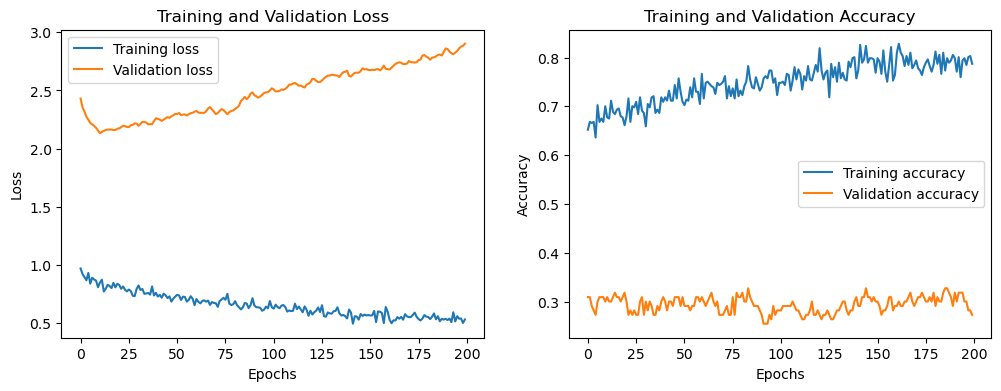

In [191]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np

# 特徴量とターゲット変数の設定
features = ['d1', 'd2', 'd3', 'd4', 'd5', 'w1', 'w2', 'w3', 'w4', 'w5', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'p']

# 特徴量とターゲットの抽出
X = df_all_drop_exp[features]
Y = df_all_drop_s_max

# ターゲットを数値ラベルに変換
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

# データを訓練用とテスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# 特徴量を標準化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 交差検証の設定
fold_num = 5
seed = 7
np.random.seed(seed)
kfold = StratifiedKFold(n_splits=fold_num, shuffle=True, random_state=seed)
cvscores = []

for train, test in kfold.split(X_train, y_train):
    # モデルの定義
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(5, activation='softmax'))

    # モデルのコンパイル
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # モデルの訓練
    history = model.fit(X_train[train], y_train[train], epochs=200, batch_size=32, validation_split=0.2, verbose=1)

    # 評価
    scores = model.evaluate(X_train[test], y_train[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)

print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

# モデルの最終訓練
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2, verbose=1)

# モデルの評価
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

# 学習過程のプロット
plt.figure(figsize=(12, 4))

# 訓練と検証の損失をプロット
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# 訓練と検証の精度をプロット
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - accuracy: 0.3548 - loss: 2.3561
Test loss: 2.208155393600464
Test accuracy: 0.37956205010414124


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
              precision    recall  f1-score   support

        提示なし       0.00      0.00      0.00         3
      画像+報知音       0.12      0.11      0.11        19
       画像+音声       0.44      0.49      0.46        51
        画像のみ       0.17      0.13      0.15        15
        音声のみ       0.44      0.47      0.46        49

    accuracy                           0.38       137
   macro avg       0.23      0.24      0.24       137
weighted avg       0.36      0.38      0.37       137



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/seaborn/

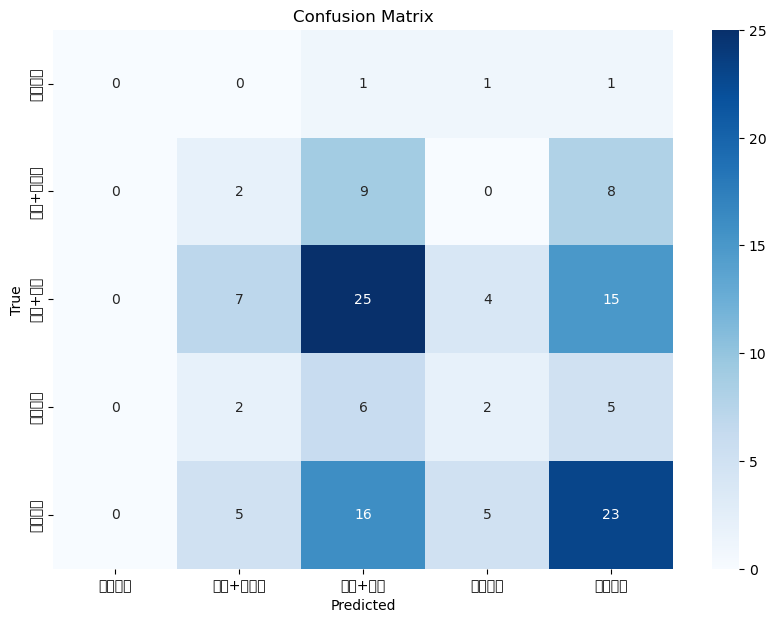

In [192]:
from sklearn.metrics import confusion_matrix, classification_report

# モデルの評価
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

# 予測を実行
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

# 混同行列の生成
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# 各クラスごとの精度を含むレポートの表示
class_report = classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_)
print(class_report)

# 混同行列のプロット
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



In [195]:
#class_reportをファイルに出力
with open('class_report.txt', 'w') as f:
    f.write(class_report)



'              precision    recall  f1-score   support\n\n        提示なし       0.00      0.00      0.00         3\n      画像+報知音       0.12      0.11      0.11        19\n       画像+音声       0.44      0.49      0.46        51\n        画像のみ       0.17      0.13      0.15        15\n        音声のみ       0.44      0.47      0.46        49\n\n    accuracy                           0.38       137\n   macro avg       0.23      0.24      0.24       137\nweighted avg       0.36      0.38      0.37       137\n'

In [193]:
# !pip install xgboost

In [196]:
# #class_reportをエクセルファイルに出力
# import openpyxl

# # ワークブックを作成
# wb = openpyxl.Workbook()
# ws = wb.active
# ws.title = 'classification_report'

# # classification_reportの内容をセルに書き込む
# for i, line in enumerate(class_report.split('\n')):
#     for j, value in enumerate(line.split()):
#         ws.cell(row=i+1, column=j+1, value=value)

# # ファイルを保存
# wb.save('classification_report.xlsx')

# # ワークブックを閉じる
# wb.close()
